# HCPC with PCA

In [1]:
import pandas as pd
import numpy as np
from scientisttools.clustering import HCPC
from scientisttools.pyplot import plot_hcpc_dendrogram,plotHCPC #,cluster_and_plot_dendrogram
from scientisttools.decomposition import PCA

In [2]:
# Analyse en composantes principales
href = "https://eric.univ-lyon2.fr/ricco/tanagra/fichiers/autos_caracterisation.txt"
autos = pd.read_csv(href,sep="\t",index_col=0)
display(autos.head())

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2,prix,origine,carburant
Modele,,,,,,,,,,,
PANDA,54,1108,150,354,159,154,860,135,8070,Europe,Essence
TWINGO,60,1149,151,344,163,143,840,143,8950,France,Essence
CITRONC2,61,1124,158,367,166,147,932,141,10700,France,Essence
YARIS,65,998,155,364,166,150,880,134,10450,Autres,Essence
FIESTA,68,1399,164,392,168,144,1138,117,14150,Europe,Diesel


In [3]:
acp = PCA(row_labels=autos.index,
          col_labels=autos.columns[:7],
          quanti_sup_labels=["CO2","prix"],
          quali_sup_labels=["origine","carburant"],
          graph=False)

#Instanciation
acp.fit(autos)

PCA(col_labels=Index(['puissance', 'cylindree', 'vitesse', 'longueur', 'largeur', 'hauteur',
       'poids'],
      dtype='object'),
    quali_sup_labels=['origine', 'carburant'],
    quanti_sup_labels=['CO2', 'prix'],
    row_labels=Index(['PANDA       ', 'TWINGO      ', 'CITRONC2    ', 'YARIS       ',
       'FIESTA      ', 'CORSA       ', 'GOLF        ', 'P1007       ',
       'MUSA        ', 'CLIO        ', 'AUDIA3      ', 'MODUS       ',
       'AVENSIS     ', 'P407        ', 'CITRONC4    ', 'MERC_A      ',
       'MONDEO      ', 'VECTRA      ', 'PASSAT      ', 'VELSATIS    ',
       'LAGUNA      ', 'MEGANECC      ', 'P307CC      ', 'P607        ',
       'MERC_E      ', 'CITRONC5    ', 'PTCRUISER   ', 'MAZDARX8    ',
       'BMW530      ', 'ALFA 156    '],
      dtype='object', name='Modele'))

In [4]:
hcpc =HCPC(n_clusters=4,min_clusters=2,max_clusters=8,graph=False)
hcpc.fit(acp)

30


HCPC(graph=False, n_clusters=4)

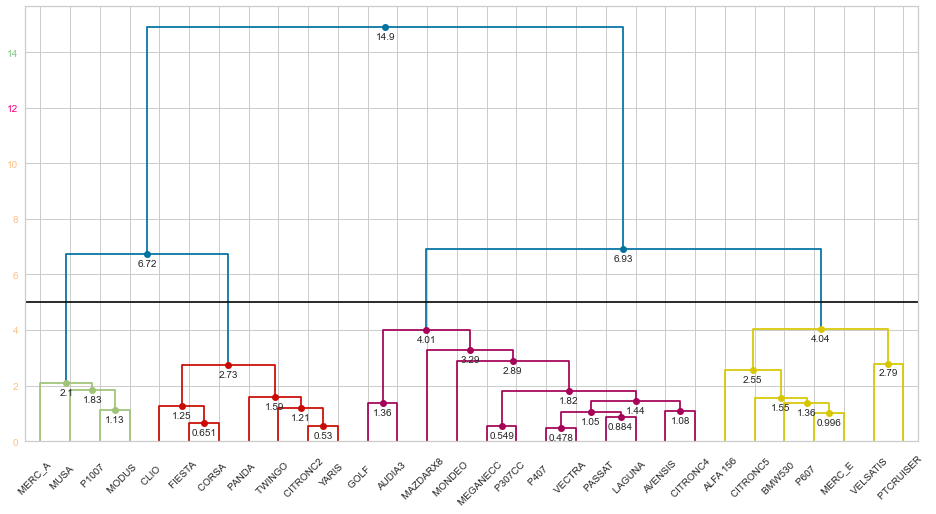

In [5]:
# Plot dendodgram
import matplotlib.pyplot as plt
fig,axe = plt.subplots(figsize=(16,8))
plot_hcpc_dendrogram(hcpc,ax=axe,max_d=5)
plt.show()

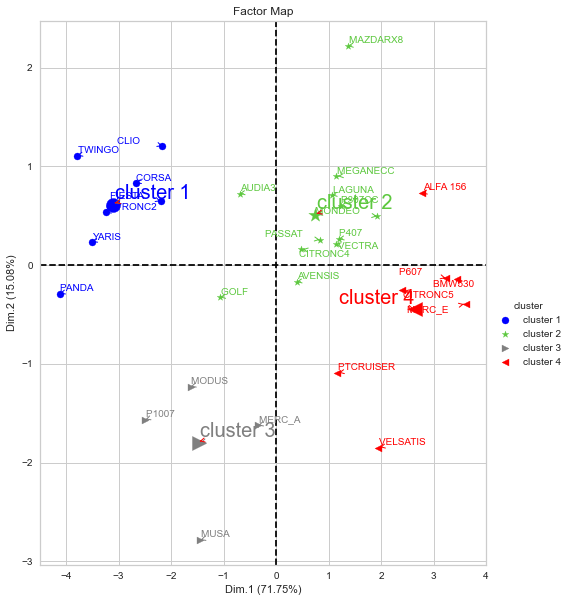

In [6]:
fig,axe = plt.subplots(figsize=(10,10))
plotHCPC(hcpc,ax=axe,color=["blue",'#5DC83F','gray','red'],marker=['o',"*",'>','<'],
         title="Factor Map",show_clust_cent=True,center_marker_size=200)
plt.show()

C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 30 rows containing missing values.
C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\guides\guides.py:253: PlotnineWarning: geom_point legend : Removed 4 rows containing missing values.


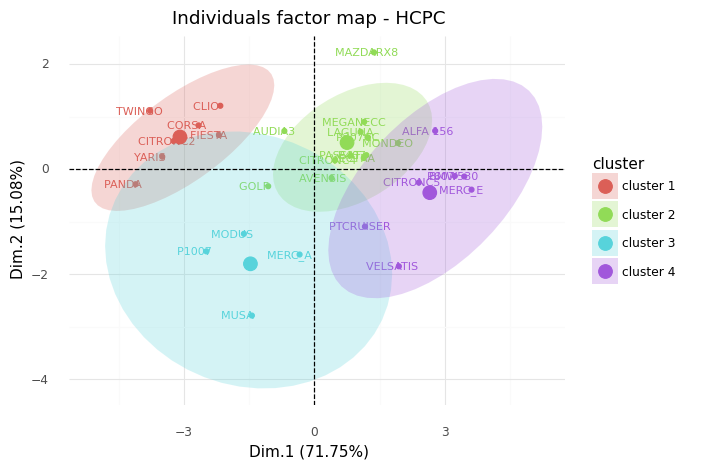

<ggplot: (105247835671)>

In [7]:
from scientisttools.ggplot import fviz_hcpc_cluster
fviz_hcpc_cluster(hcpc,
                  repel=False,
                  show_clust_cent=True,
                  center_marker_size=5)

In [8]:
Xmean=hcpc.gmean_
Xmean

,cluster 1,cluster 2,cluster 3,cluster 4
puissance,68.285714,146.000000,107.00,210.285714
cylindree,1212.428571,1878.583333,1714.75,2744.857143
vitesse,161.142857,209.833333,183.25,229.000000
longueur,369.571429,448.000000,384.25,470.142857
largeur,164.428571,178.916667,171.50,180.285714
hauteur,146.285714,144.000000,162.25,148.428571
poids,952.142857,1366.583333,1241.50,1611.714286


In [9]:
active_data= autos[autos.columns[:7]]
means = active_data.mean(axis=0)
std = active_data.std(ddof=1,axis=0)
n_rows, n_cols = active_data.shape

In [10]:
hcpc.cluster_infos_

,n(k),p(k)
cluster,,
cluster 1,7,0.233333
cluster 2,12,0.400000
cluster 3,4,0.133333
cluster 4,7,0.233333


In [11]:
hcpc.cluster_centers_

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7
cluster,,,,,,,
cluster 1,-3.097315,0.610998,-0.137234,-0.157944,0.068859,0.006974,-0.022314
cluster 2,0.749909,0.504722,0.426740,0.103676,-0.001338,0.038316,0.031349
cluster 3,-1.474254,-1.800563,-0.264118,0.313724,-0.340969,-0.016792,0.119213
cluster 4,2.654188,-0.447342,-0.443396,-0.199057,0.128274,-0.063064,-0.099550


In [12]:
hcpc.desc_var_quanti_

{'cluster 1':               vtest    pvalue  mean in category  overall mean  \
 hauteur   -0.703561  0.481706        146.285714    148.000000   
 cylindree -3.497579  0.000470       1212.428571   1903.433333   
 puissance -3.537241  0.000404         68.285714    137.666667   
 vitesse   -3.757306  0.000172        161.142857    199.400000   
 longueur  -3.814468  0.000136        369.571429    426.366667   
 largeur   -4.019667  0.000058        164.428571    174.866667   
 poids     -4.281878  0.000019        952.142857   1310.400000   
 
            sd in categorie  overall sd significant  
 hauteur           4.025429    7.238784              
 cylindree       154.267724  586.945351         ***  
 puissance        13.863769   58.271968         ***  
 vitesse          11.128195   30.249628         ***  
 longueur         16.034402   44.234589         ***  
 largeur           2.664965    7.714633         ***  
 poids            99.182989  248.567710         ***  ,
 'cluster 2':           

In [13]:
hcpc.desc_axes_infos_

{'cluster 1':           vtest    pvalue  mean in category  overall mean  sd in categorie  \
 Dim.2  1.766479  0.077316          0.610998  5.181041e-17         0.478820   
 Dim.5  0.561552  0.574421          0.068859  3.719247e-16         0.227041   
 Dim.6  0.076496  0.939025          0.006974  2.349972e-16         0.200666   
 Dim.7 -0.358829  0.719723         -0.022314 -1.397031e-16         0.127367   
 Dim.3 -0.578178  0.563144         -0.137234 -7.623531e-16         0.329209   
 Dim.4 -1.093279  0.274271         -0.157944  1.850372e-17         0.164765   
 Dim.1 -4.105940  0.000040         -3.097315 -9.325873e-16         0.712298   
 
        overall sd significant  
 Dim.2    1.027579           *  
 Dim.5    0.364294              
 Dim.6    0.270851              
 Dim.7    0.184743              
 Dim.3    0.705153              
 Dim.4    0.429197              
 Dim.1    2.241078         ***  ,
 'cluster 2':           vtest    pvalue  mean in category  overall mean  sd in categorie

In [14]:
hcpc.gmean_

,cluster 1,cluster 2,cluster 3,cluster 4
puissance,68.285714,146.000000,107.00,210.285714
cylindree,1212.428571,1878.583333,1714.75,2744.857143
vitesse,161.142857,209.833333,183.25,229.000000
longueur,369.571429,448.000000,384.25,470.142857
largeur,164.428571,178.916667,171.50,180.285714
hauteur,146.285714,144.000000,162.25,148.428571
poids,952.142857,1366.583333,1241.50,1611.714286


In [15]:
hcpc.correlation_ratio_

,Sum. Intra,Sum. Inter,correlation ratio,F-stats,pvalue
poids,2.627402e+05,1.590837e+06,0.8583,52.4749,0.0
longueur,9.995321e+03,4.870565e+04,0.8297,42.2313,0.0
cylindree,1.886958e+06,8.448187e+06,0.8174,38.8019,0.0
puissance,2.666286e+04,7.520581e+04,0.7383,24.4454,0.0
vitesse,8.723274e+03,1.872793e+04,0.6822,18.6064,0.0
largeur,5.750595e+02,1.210407e+03,0.6779,18.2419,0.0
hauteur,5.458929e+02,1.026107e+03,0.6527,16.2906,0.0


In [16]:
hcpc.cluster_

,cluster
Modele,
PANDA,cluster 1
TWINGO,cluster 1
CITRONC2,cluster 1
YARIS,cluster 1
FIESTA,cluster 1
CORSA,cluster 1
GOLF,cluster 2
P1007,cluster 3
MUSA,cluster 3
